In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN



In [78]:
df = pd.read_csv('hotel_bookings.csv')
df = df.head(10000).copy()

In [79]:

numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

df_numeric = df_numeric.fillna(0)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


In [99]:
pca = PCA(n_components=7)  
df_pca = pca.fit_transform(df_scaled)


print("Доля объяснённой дисперсии каждой компоненты:", pca.explained_variance_ratio_)
print("Суммарная доля:", sum(pca.explained_variance_ratio_))


Доля объяснённой дисперсии каждой компоненты: [0.11884496 0.10974054 0.10416229 0.07469876 0.0708308  0.06598553
 0.06185442]
Суммарная доля: 0.606117300227817


In [100]:
from sklearn.metrics import silhouette_score
kmeans_models = {}
inertia_values = []

k_values = range(2, 20)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette score={score:.3f}")

    


k=2, silhouette score=0.191
k=3, silhouette score=0.171
k=4, silhouette score=0.200
k=5, silhouette score=0.204
k=6, silhouette score=0.221
k=7, silhouette score=0.238
k=8, silhouette score=0.245
k=9, silhouette score=0.195
k=10, silhouette score=0.200
k=11, silhouette score=0.192
k=12, silhouette score=0.195
k=13, silhouette score=0.202
k=14, silhouette score=0.200
k=15, silhouette score=0.202
k=16, silhouette score=0.193
k=17, silhouette score=0.190
k=18, silhouette score=0.186
k=19, silhouette score=0.187


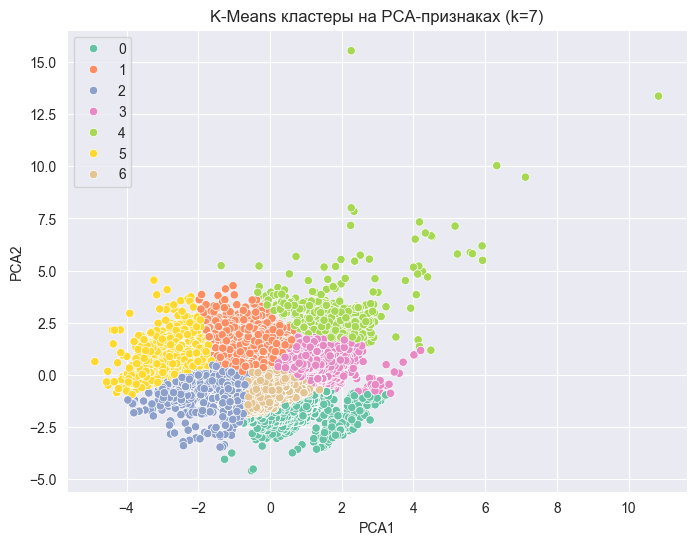

In [101]:
import seaborn as sns

plt.figure(figsize=(8,6))
k = 7 
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df_pca[:, :2])

sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=labels, palette='Set2', legend='full')
plt.title(f'K-Means кластеры на PCA-признаках (k={k})')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


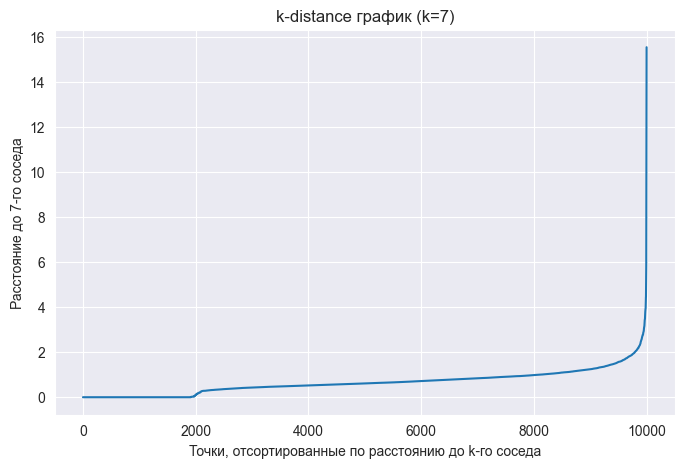

In [105]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

min_samples = 7
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

# Берём расстояние до k-го соседа и сортируем
k_distances = np.sort(distances[:, min_samples-1])

# Строим график k-distance
plt.figure(figsize=(8,5))
plt.plot(k_distances)
plt.title(f'k-distance график (k={min_samples})')
plt.xlabel('Точки, отсортированные по расстоянию до k-го соседа')
plt.ylabel(f'Расстояние до {min_samples}-го соседа')
plt.show()


In [106]:

dbscan = DBSCAN(eps=1.4, min_samples=min_samples)
labels = dbscan.fit_predict(df_pca)


n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Количество кластеров: {n_clusters}")
print(f"Количество шумовых точек: {n_noise}")



Количество кластеров: 14
Количество шумовых точек: 387


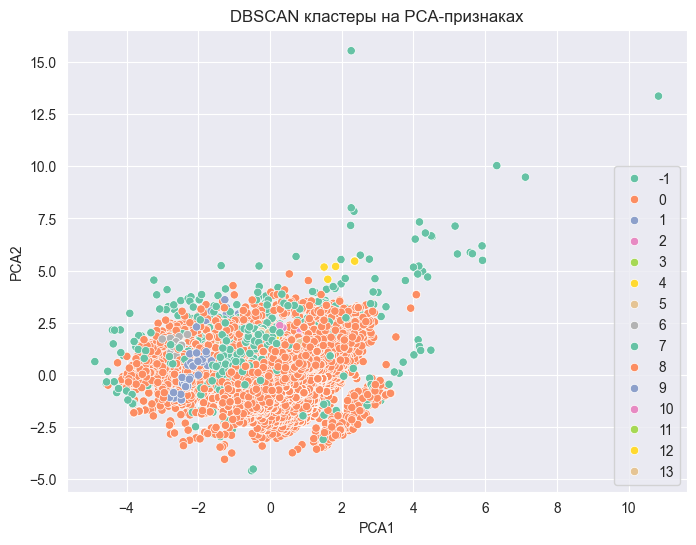

In [107]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=labels, palette='Set2', legend='full')
plt.title('DBSCAN кластеры на PCA-признаках')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()